In [1]:
import cv2
from deepface import DeepFace
import os
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('images/happy_boy.jpg')

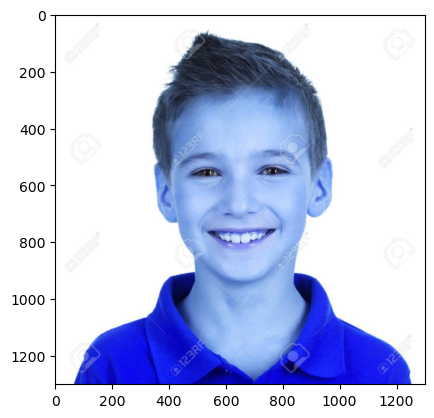

In [3]:
plt.imshow(img)

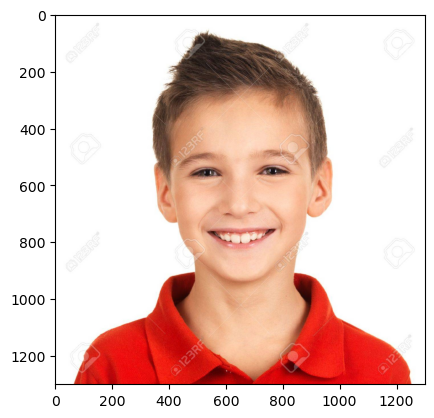

In [4]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [5]:
predictions = DeepFace.analyze(img)

Action: race: 100%|██████████| 4/4 [00:12<00:00,  3.01s/it]   


In [6]:
predictions

[{'emotion': {'angry': 6.317987941092009e-17,
   'disgust': 1.7969131238449235e-22,
   'fear': 7.814250838824324e-15,
   'happy': 100.0,
   'sad': 1.3446259461297465e-13,
   'surprise': 1.039426952102458e-13,
   'neutral': 9.13704223393097e-07},
  'dominant_emotion': 'happy',
  'region': {'x': 322, 'y': 297, 'w': 656, 'h': 656},
  'age': 22,
  'gender': {'Woman': 0.33787472639232874, 'Man': 99.66212511062622},
  'dominant_gender': 'Man',
  'race': {'asian': 0.039713467781733604,
   'indian': 0.16112695040577057,
   'black': 0.0042968700319755485,
   'white': 75.11290015136005,
   'middle eastern': 13.4019629242376,
   'latino hispanic': 11.280000809431172},
  'dominant_race': 'white'}]

In [7]:
type(predictions)

list

In [8]:
predictions[0]['dominant_emotion']

'happy'

In [9]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'images/haarcascade_frontalface_default.xml')

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(gray, 1.1, 4)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

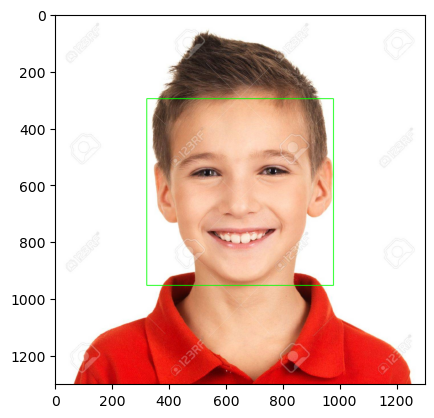

In [175]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [176]:
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img, 
            predictions[0]['dominant_emotion'],
            (50, 100), 
            font, 3, 
            (0, 0, 255), 
            2, 
            cv2.LINE_4);

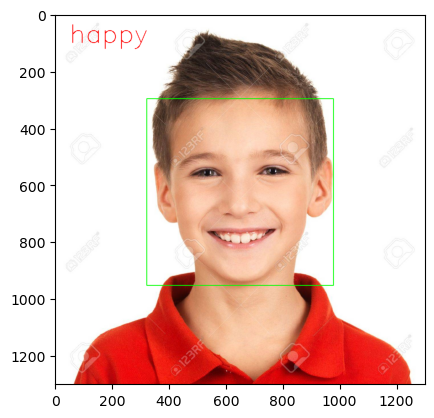

In [177]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [227]:
img = cv2.imread('images/scared_man.jpg')

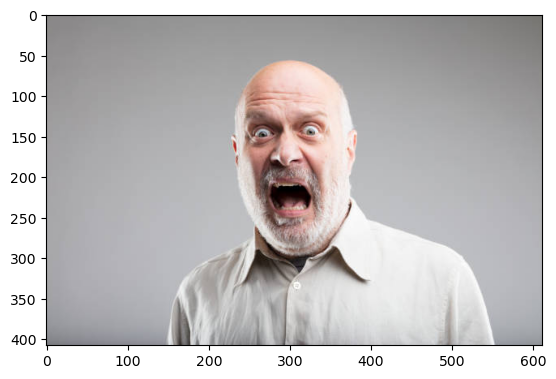

In [228]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [213]:
predictions = DeepFace.analyze(img)

Action: race: 100%|██████████| 4/4 [00:22<00:00,  5.75s/it]   


In [229]:
predictions

[{'emotion': {'angry': 15.191683173179626,
   'disgust': 0.00035781824863079237,
   'fear': 83.27386975288391,
   'happy': 0.022879039170220494,
   'sad': 0.06129016983322799,
   'surprise': 1.4498586766421795,
   'neutral': 6.43510702502681e-05},
  'dominant_emotion': 'fear',
  'region': {'x': 224, 'y': 84, 'w': 150, 'h': 150},
  'age': 28,
  'gender': {'Woman': 0.004098605495528318, 'Man': 99.99589920043945},
  'dominant_gender': 'Man',
  'race': {'asian': 1.238787453621626,
   'indian': 6.706366688013077,
   'black': 75.139981508255,
   'white': 1.8599430099129677,
   'middle eastern': 0.8746854960918427,
   'latino hispanic': 14.180232584476471},
  'dominant_race': 'black'}]

In [230]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(gray, 1.1, 4)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

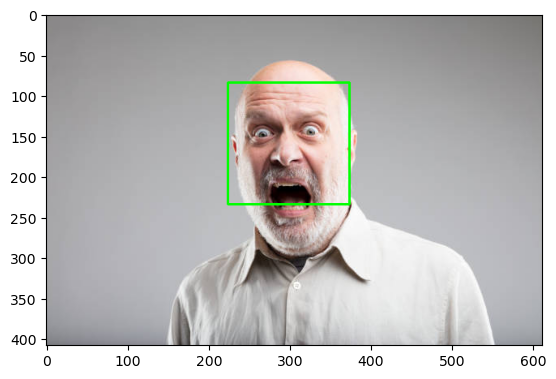

In [231]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [232]:
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img, 
            predictions[0]['dominant_emotion'],
            (50, 100), 
            font, 3, 
            (0, 0, 255), 
            2, 
            cv2.LINE_4);

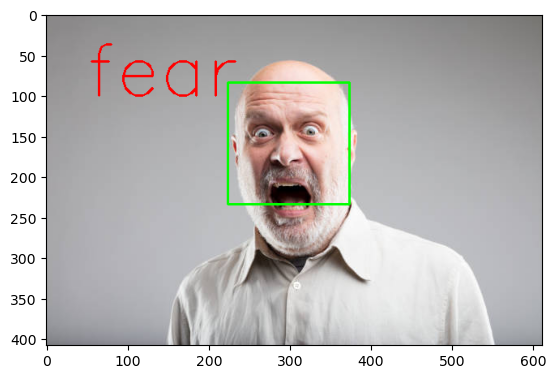

In [233]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [1]:
import cv2
from deepface import DeepFace

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    
    try:
        result = DeepFace.analyze(frame, actions = ['emotion'])
    except ValueError as e:
        print(e)
        continue

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    cv2.putText(frame,
               result[0]['dominant_emotion'],  # Changed from result[0]['dominant_emotion']
               (50, 50),
               font, 3,
               (0, 0, 255),
               2,
               cv2.LINE_4)
    
    cv2.imshow('Original video', frame)
    
    # Introduce a delay of 200 milliseconds
    if cv2.waitKey(500) & 0xFF == ord('q'):
        break
    
    if cv2.getWindowProperty('Original video', cv2.WND_PROP_VISIBLE) < 1:
        break

cap.release()
cv2.destroyAllWindows()

Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 16.56it/s]


In [2]:
#Further Testing